## Importation and function definition

In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat

def wigner_plot(rho,split,saveString):
    theta_list=np.linspace(0,np.pi,split);
    phi_list=np.linspace(0,2*np.pi,split);
    wigner_function=qt.spin_wigner(rho,theta_list,phi_list);
    P_matrix=wigner_function[0];theta_matrix=wigner_function[1];phi_matrix=wigner_function[2];
    qt.plot_spin_distribution_3d(P_matrix,theta_matrix,phi_matrix,figsize=(8,6));
    
    mdic={"wigner_result":P_matrix}
    savemat(saveString,mdic)
    return 0

def decoherence_rho():
    state1=np.array([1,0,0,0,0,1]);
    state1=qt.Qobj(state1).unit();
    state2=np.array([0,1,0,0,1,0]);
    state2=qt.Qobj(state2).unit();
    state3=np.array([0,0,1,1,0,0]);
    state3=qt.Qobj(state3).unit();

    decoherence_rho=state1*qt.dag(state1)/16+state2*qt.dag(state2)*5/16+state3*qt.dag(state3)*10/16;
    decoherence_rho=qt.mesolve(qt.spin_Jz(5/2),decoherence_rho,[0,np.pi*3/2]);
    decoherence_rho=decoherence_rho.states[1];
    return decoherence_rho

sigmax=qt.spin_Jx(5/2);
sigmay=qt.spin_Jy(5/2);
sigmaz=qt.spin_Jz(5/2);

## Cat State Bloch Sphere

In [ ]:
initial_state=np.array([1,0,0,0,0,0]);
initial_state=qt.Qobj(initial_state);
initial_rho=initial_state*qt.dag(initial_state);

split=200;

cat_state=qt.mesolve(sigmax+sigmax**2,initial_rho,[0,np.pi/2]);
cat_rho=cat_state.states[1]

precess_state=qt.mesolve(sigmaz,cat_rho,[0,np.pi*3/5]);
precess_rho=precess_state.states[1];

detection_state=qt.mesolve(sigmax+sigmax**2,precess_rho,[0,3*np.pi/2]);
detection_rho=detection_state.states[1]

#%matplotlib ipympl


wigner_plot(initial_rho,split,'initial.mat');


wigner_plot(cat_rho,split,'cat.mat');


wigner_plot(precess_rho,split,'precess_cat.mat');


wigner_plot(detection_rho,split,'detect_cat.mat');


## Mixed State Bloch Sphere

In [ ]:
initial_state=np.array([1,0,0,0,0,0]);
initial_state=qt.Qobj(initial_state);
initial_rho=initial_state*qt.dag(initial_state);

split=200;

coherent_state=qt.mesolve(sigmax,initial_rho,[0,np.pi/2]);
coherent_rho=coherent_state.states[1]

precess_state=qt.mesolve(sigmaz,decoherence_rho(),[0,np.pi*3/5]);
precess_rho=precess_state.states[1];

detection_state=qt.mesolve(sigmax,precess_rho,[0,3*np.pi/2]);
detection_rho=detection_state.states[1]

#%matplotlib ipympl


wigner_plot(initial_rho,split,'initial.mat');


wigner_plot(coherent_rho,split,'coherent.mat');


wigner_plot(precess_rho,split,'precess_mix.mat');


wigner_plot(detection_rho,split,'detect_mix.mat');






In [ ]:
split = 200;

for mF_num in range(0,6):
    m_state = np.array([0,0,0,0,0,0]);
    m_state[mF_num] = 1;
    qm_state = qt.Qobj(m_state);
    m_rho = qm_state*qt.dag(qm_state);
    
    m_string = str(-mF_num*2+5)+'over2.mat';
    wigner_plot(m_rho,split,m_string);


In [ ]:
split = 200;

for mF_num in range(0,3):
    m_state = np.array([0,0,0,0,0,0]);
    
    m_state[mF_num] = 1;
    m_state[5-mF_num] =1;
    qm_state = qt.Qobj(m_state).unit();
    m_rho = qm_state*qt.dag(qm_state);
    m_string = str(-mF_num*2+5)+'DFS.mat';
    wigner_plot(m_rho,split,m_string);


## Dual Ramsey

0

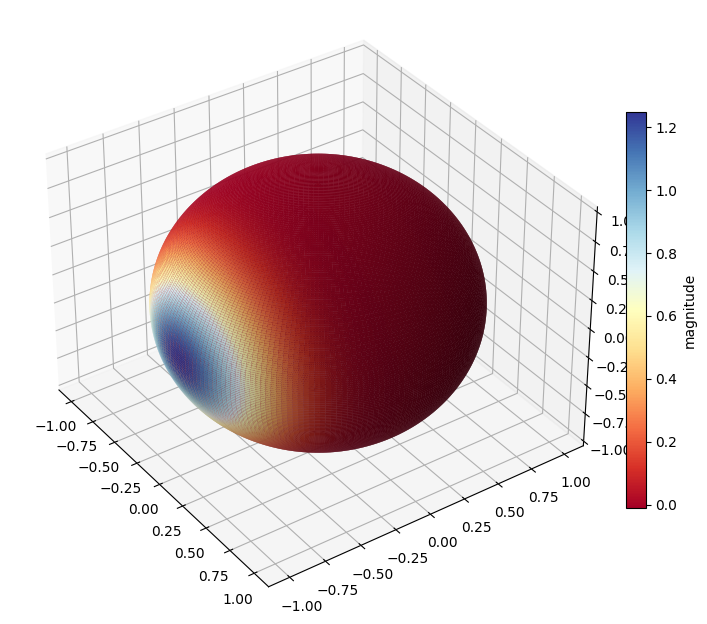

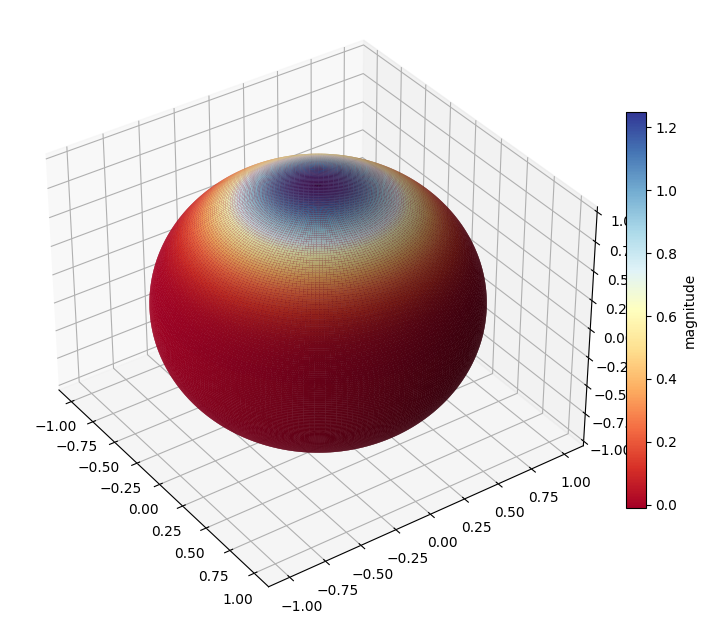

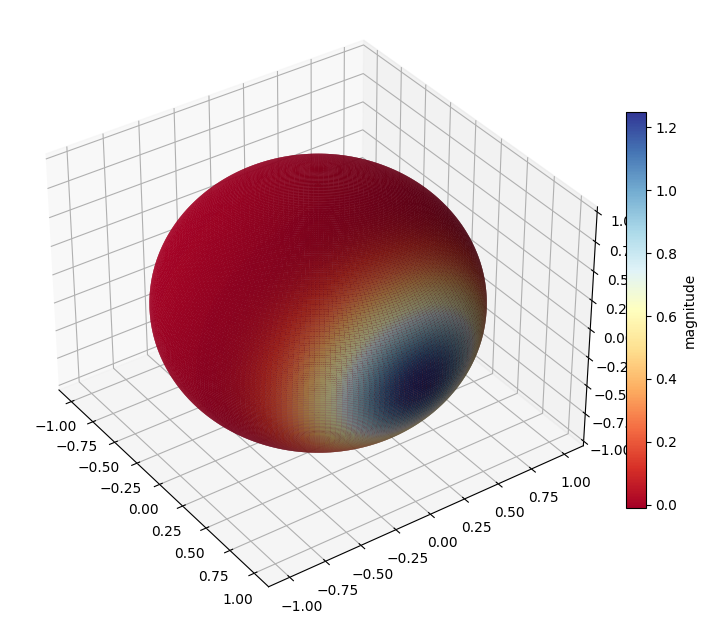

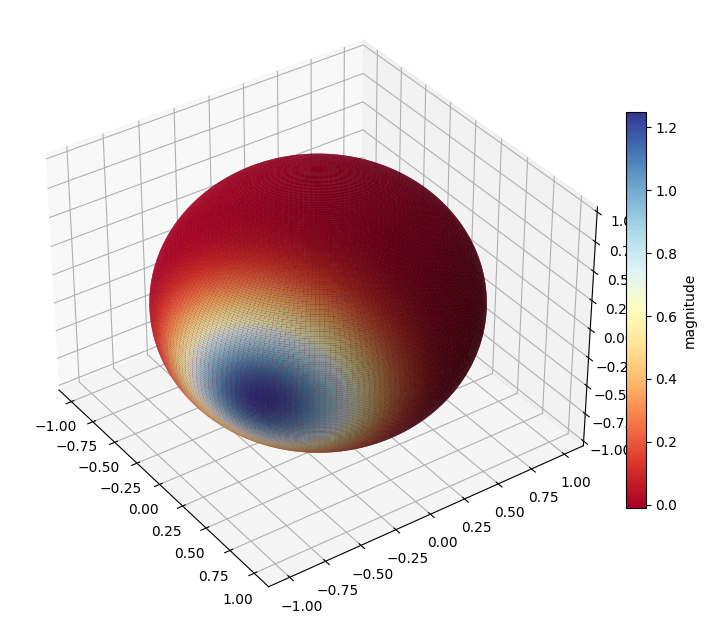

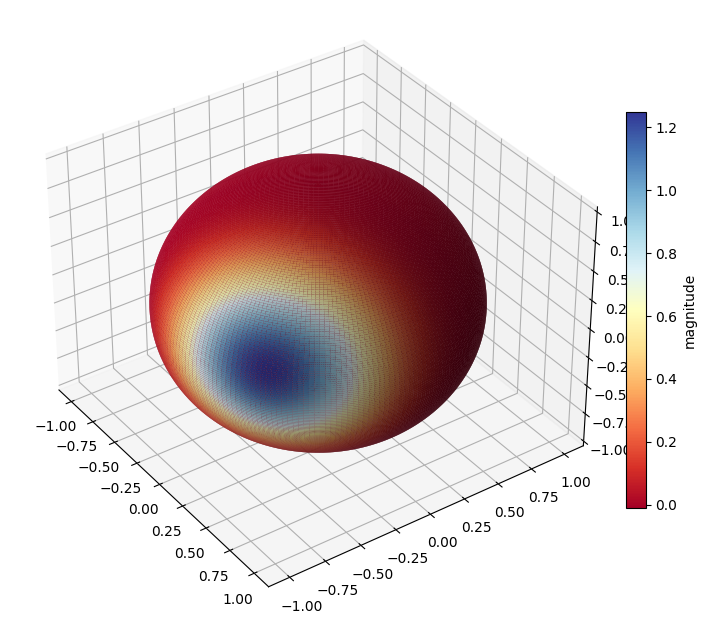

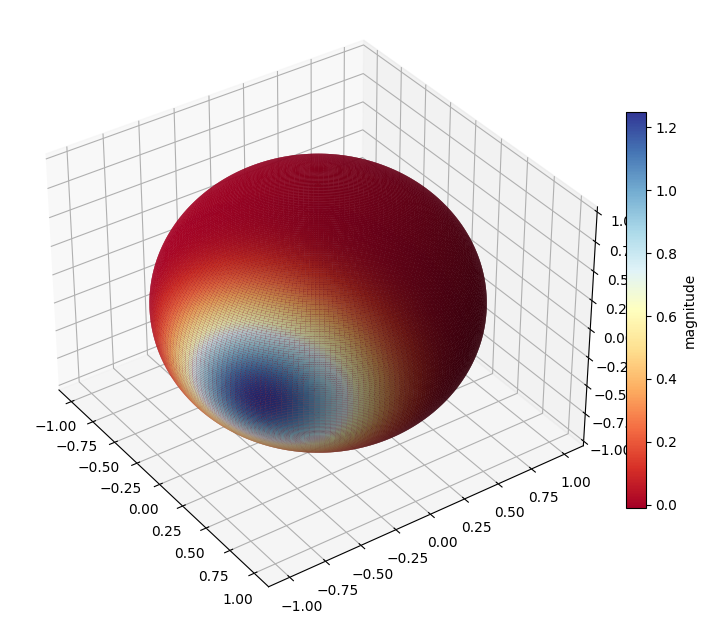

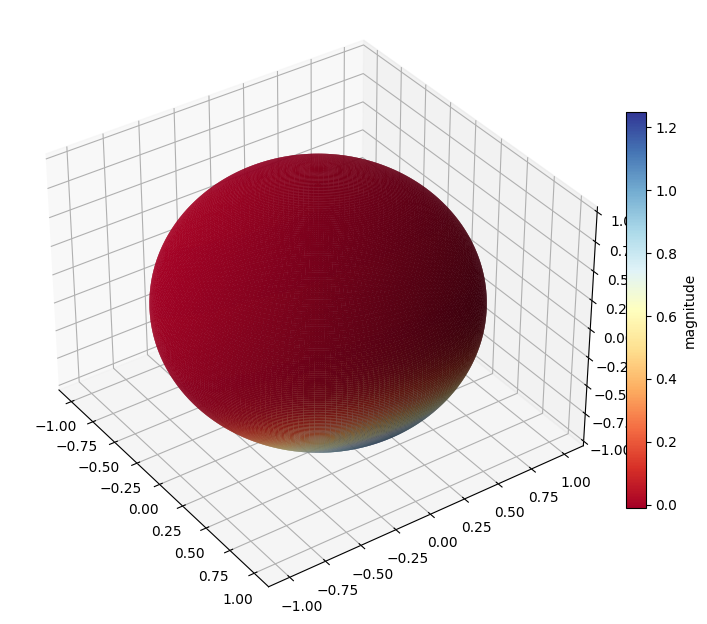

In [21]:
initial_state=np.array([1,0,0,0,0,0]);
initial_state=qt.Qobj(initial_state);
initial_rho=initial_state*qt.dag(initial_state);

split=200;

coherent_state=qt.mesolve(sigmax,initial_rho,[0,np.pi/2]);
coherent_rho=coherent_state.states[1]

precess_CSS=qt.mesolve(sigmaz,coherent_rho,[0,np.pi/2]);
precess_CSS_rho=precess_CSS.states[1];


precess_CSS_n=qt.mesolve(sigmaz,coherent_rho,[0,np.pi/5]);
precess_CSS_n_rho=precess_CSS_n.states[1];

yb171_after_readout_173=qt.mesolve(sigmax,precess_CSS_n_rho,[0,np.pi*3.91]);
yb171_after_readout_173_rho=yb171_after_readout_173.states[1];

compensate=qt.mesolve(sigmax,yb171_after_readout_173_rho,[0,np.pi*0.09]);
compensate_rho=compensate.states[1];

yb171_readout=qt.mesolve(sigmax,compensate_rho,[0,np.pi/2]);
yb171_readout_rho=yb171_readout.states[1];

wigner_plot(coherent_rho,split,'coherent.mat');
wigner_plot(initial_rho,split,'initial.mat');
wigner_plot(precess_CSS_rho,split,'CSS_precess.mat');
wigner_plot(precess_CSS_n_rho,split,'CSS_precess_n.mat');
wigner_plot(yb171_after_readout_173_rho,split,'yb171_after_readout_173_rho.mat');
wigner_plot(compensate_rho,split,'compensate.mat')
wigner_plot(yb171_readout_rho,split,'yb171_readout.mat')